In [2]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np

from dateutil import parser
from scipy.interpolate import CubicSpline

# ETH price

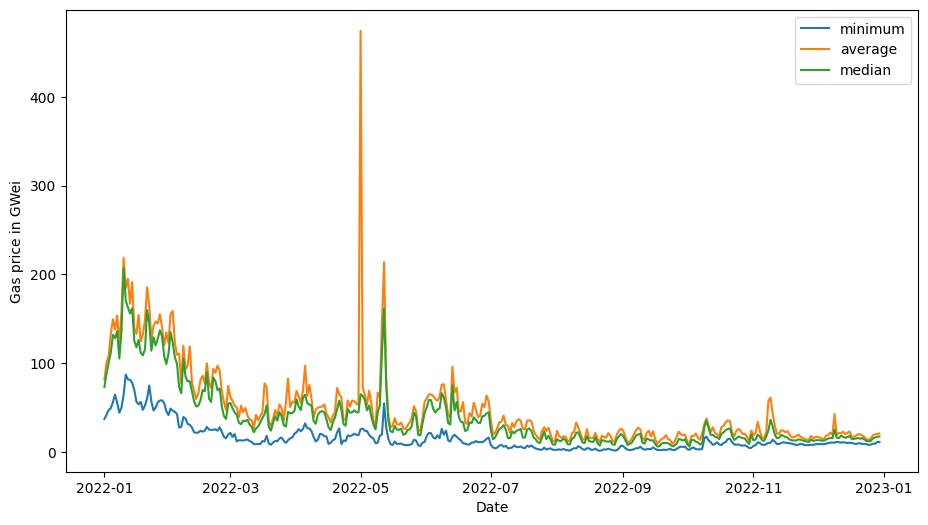

In [7]:
# eth price in 2022
f = open("results/eth_price_2022.json", "r")
data = json.load(f)
date = []
avg_price = []
med_price = []
min_price = []
for row in data['data']['get_execution']['execution_succeeded']['data'] :
    date.append(parser.parse(row['time']))
    avg_price.append(row['avg_gas_price'])
    med_price.append(row['median_gas_price'])
    min_price.append(row['min_gas_price'])

plt.figure(figsize=(11,6))
plt.plot(date, min_price, label="minimum")
plt.plot(date, avg_price, label="average")
plt.plot(date, med_price, label="median")
plt.legend(loc='upper right')
plt.xlabel("Date")
plt.ylabel("Gas price in GWei")
plt.show()

# Optimism AMB

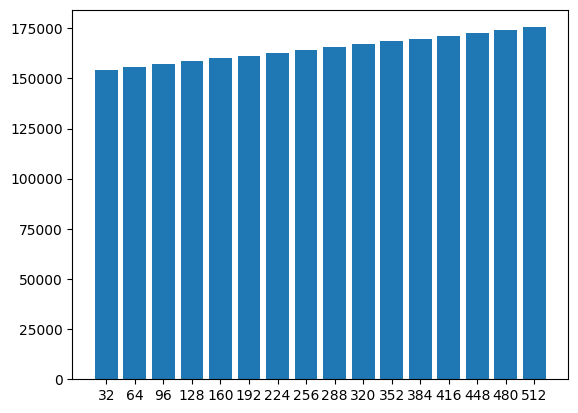

In [28]:
f = open('results/optimism-amb/l1CrossDomainMessenger_sendMessage', 'r')
lines = f.readlines()

number_of_bytes = []
consumed_l1_gas = []

for line in lines:  
    byte, gas = line.split()
    number_of_bytes.append(byte)
    consumed_l1_gas.append(int(gas))
plt.bar(number_of_bytes, consumed_l1_gas)
plt.show()

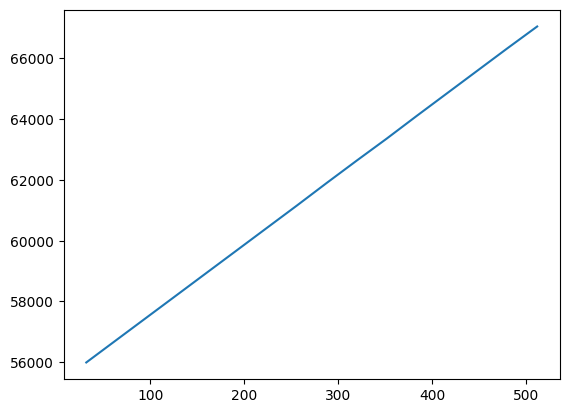

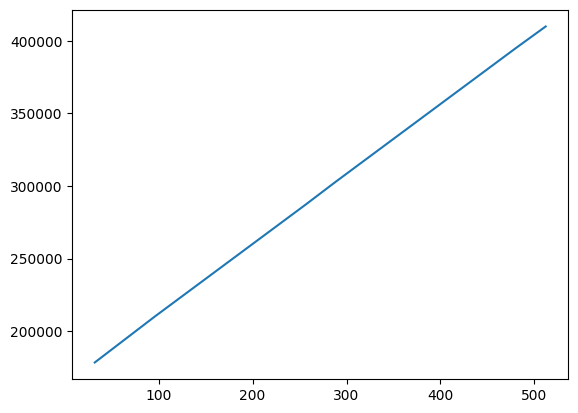

In [29]:
f = open('results/optimism-amb/l2CrossDomainMessenger_relayMessage', 'r')
lines = f.readlines()

number_of_bytes = []
consumed_fee_l1 = []
consumed_gas_l2 = []

for line in lines:  
    byte, l2_gas, l1_fee = line.split()
    number_of_bytes.append(int(byte))
    consumed_gas_l2.append(int(l2_gas))
    consumed_fee_l1.append(int(l1_fee))

# plt.bar(number_of_bytes, consumed_gas_l1)
plt.plot(number_of_bytes, consumed_gas_l2)
plt.show()
plt.plot(number_of_bytes, consumed_fee_l1)
plt.show()

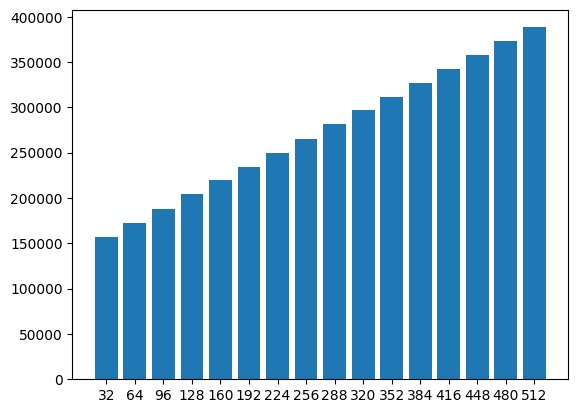

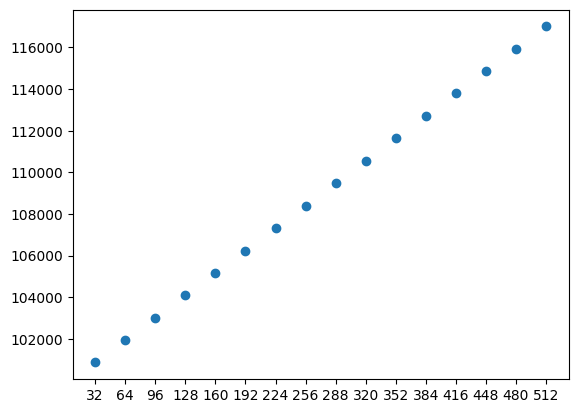

In [30]:
f = open('results/optimism-amb/l2CrossDomainMessenger_sendMessage', 'r')
lines = f.readlines()

number_of_bytes = []
consumed_fee_l1 = []
consumed_gas_l2 = []

for line in lines:  
    byte, l2_gas, l1_fee = line.split()
    number_of_bytes.append(byte)
    consumed_gas_l2.append(int(l2_gas))
    consumed_fee_l1.append(int(l1_fee))

plt.bar(number_of_bytes, consumed_fee_l1)
plt.show()
plt.scatter(number_of_bytes, consumed_gas_l2)
plt.show()

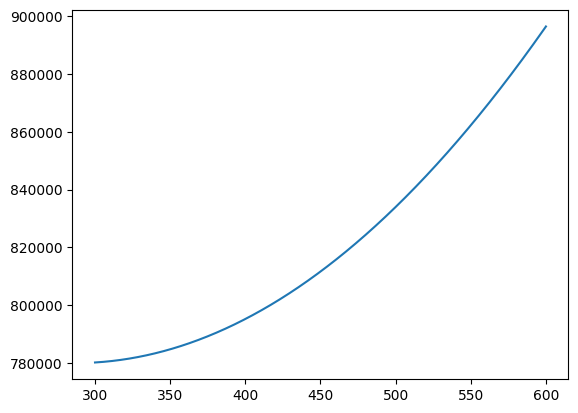

In [31]:
# l1CrossDomainMessenger.relayMessage <L1, L2->L1>
f = open('results/optimism-amb/l1CrossDomainMessenger_relayMessage', 'r')
lines = f.readlines()

message_byte_len = []
consumed_l1_gas = []

for line in lines:  
    byte, l1_gas = line.split()
    message_byte_len.append(int(byte))
    consumed_l1_gas.append(int(l1_gas))

x = message_byte_len
y = consumed_l1_gas

xvals = np.linspace(300, 600, 1000)
spl = CubicSpline(x, y) # First generate spline function
y_smooth = spl(xvals) # then evalute for your interpolated points

plt.plot(xvals, y_smooth)
plt.show()

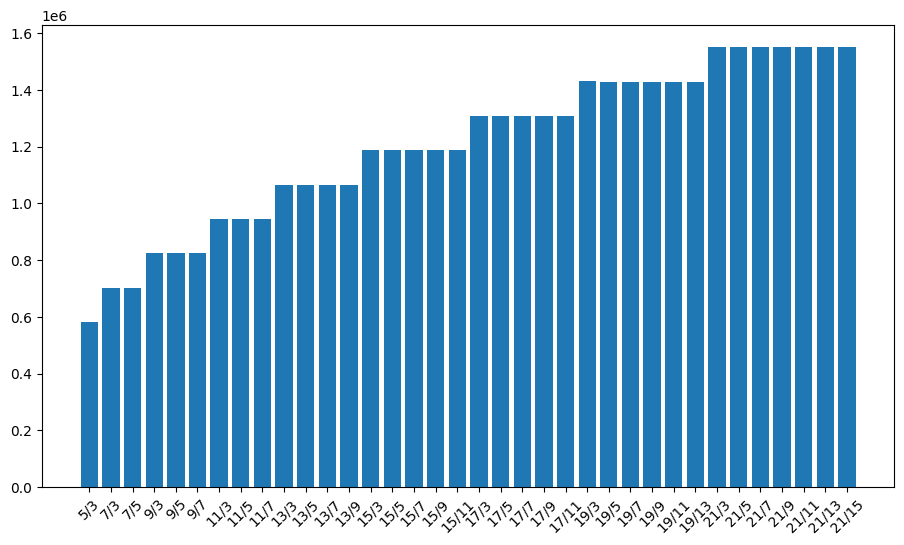

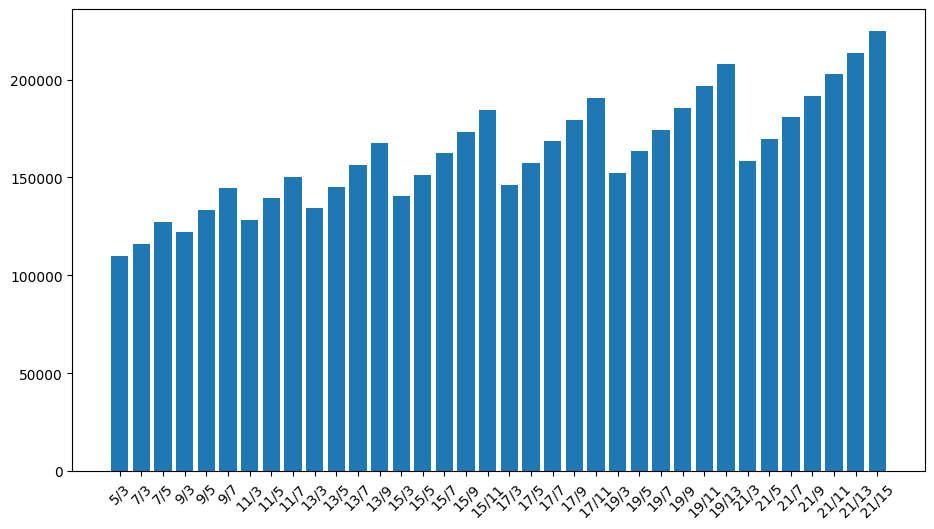

In [32]:
f = open('results/celler/busreceiver_executemessage', 'r')
lines = f.readlines()

validator_sigs = []
consumed_fee_l1 = []
consumed_gas_l2 = []

for line in lines:  
    validator_num, quorum_num, l2_gas, l1_fee = line.split()
    validator_sigs.append("" + validator_num + "/" + quorum_num)
    consumed_gas_l2.append(int(l2_gas))
    consumed_fee_l1.append(int(l1_fee))

plt.figure(figsize=(11,6))
plt.bar(validator_sigs, consumed_fee_l1)
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize=(11,6))
plt.bar(validator_sigs, consumed_gas_l2)
plt.xticks(rotation = 45)
plt.show()

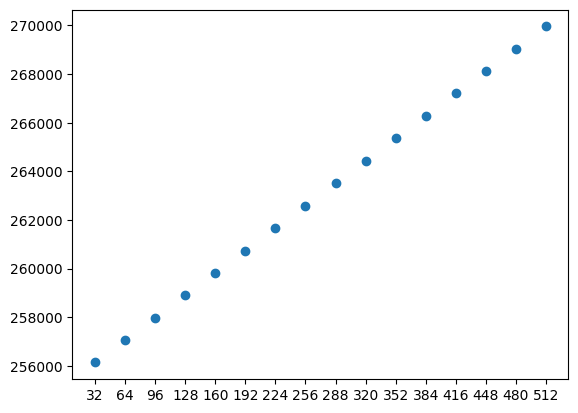

In [33]:
f = open('results/connext/xcall', 'r')
lines = f.readlines()

bytes_num = []
consumed_gas_l2 = []

for line in lines:  
    b_num, l2_gas = line.split()
    bytes_num.append(b_num)
    consumed_gas_l2.append(int(l2_gas))

plt.scatter(bytes_num, consumed_gas_l2)
plt.show()

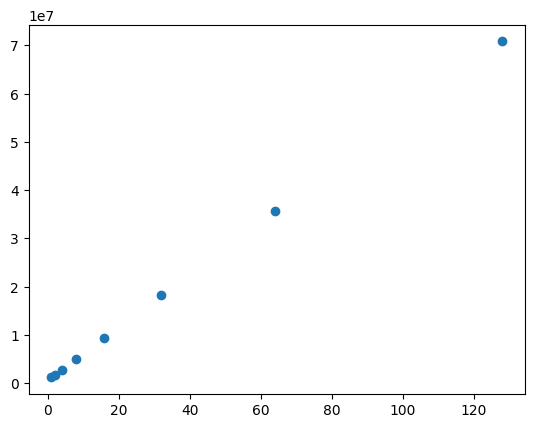

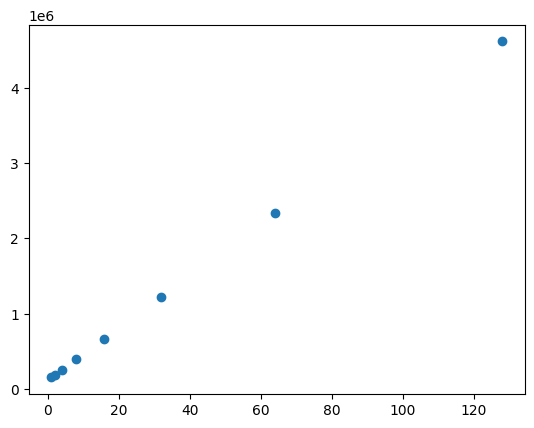

In [116]:
f = open('results/connext/prove_and_process', 'r')
lines = f.readlines()

proofs_num = []
consumed_fee_l1 = []
consumed_gas_l2 = []

for line in lines:  
    p_num, l2_gas, l1_fee = line.split()
    proofs_num.append(int(p_num))
    consumed_gas_l2.append(int(l2_gas))
    consumed_fee_l1.append(int(l1_fee))

plt.scatter(proofs_num, consumed_fee_l1)
plt.show()
plt.scatter(proofs_num, consumed_gas_l2)
plt.show()

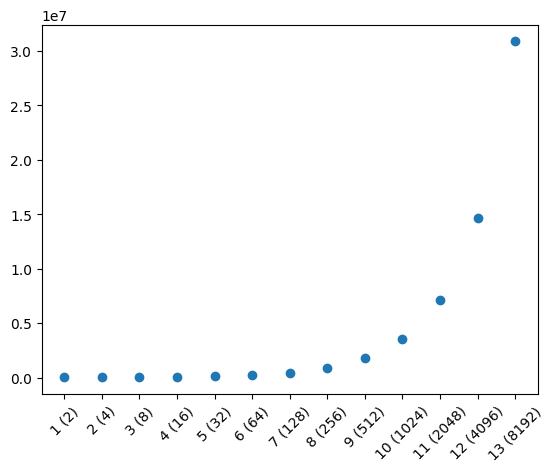

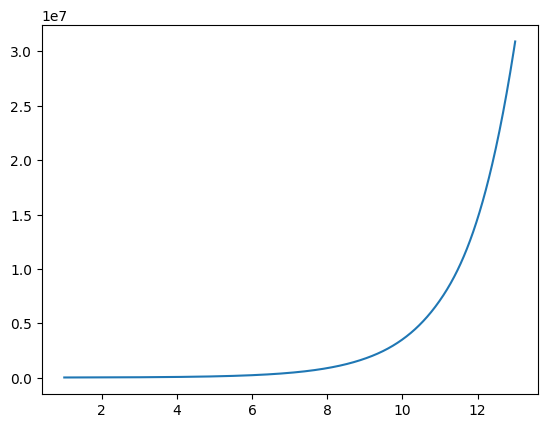

In [117]:
f = open('results/opt-cr-with-merkle/merkle_height_challenging', 'r')
lines = f.readlines()

labels = []
consumed_gas_l2 = []
heights = []

for line in lines:  
    height, nodes_num, l2_gas = line.split()
    heights.append(int(height))
    labels.append("" + height + " (" + nodes_num + ")")
    consumed_gas_l2.append(int(l2_gas))

plt.scatter(labels, consumed_gas_l2)
plt.xticks(rotation = 45)
plt.show()

x = heights
y = consumed_gas_l2

xvals = np.linspace(1, 13, 1000)
spl = CubicSpline(x, y) # First generate spline function
y_smooth = spl(xvals) # then evalute for your interpolated points

plt.plot(xvals, y_smooth)
plt.show()

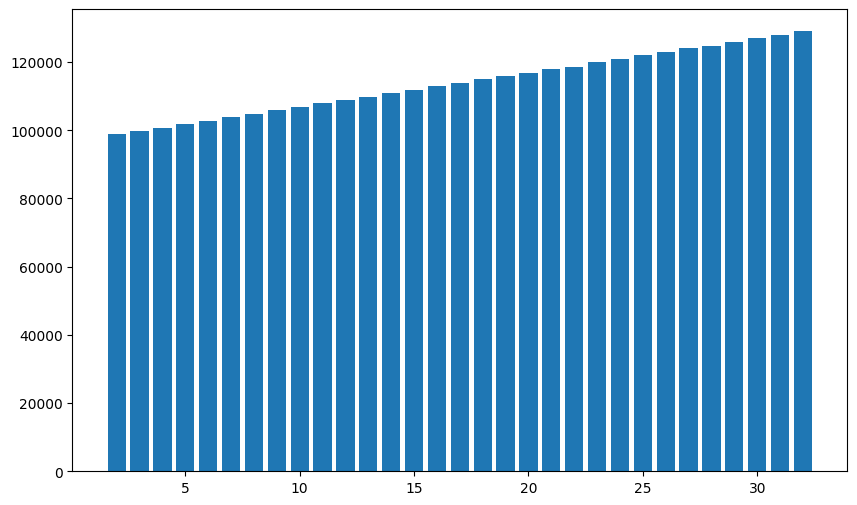

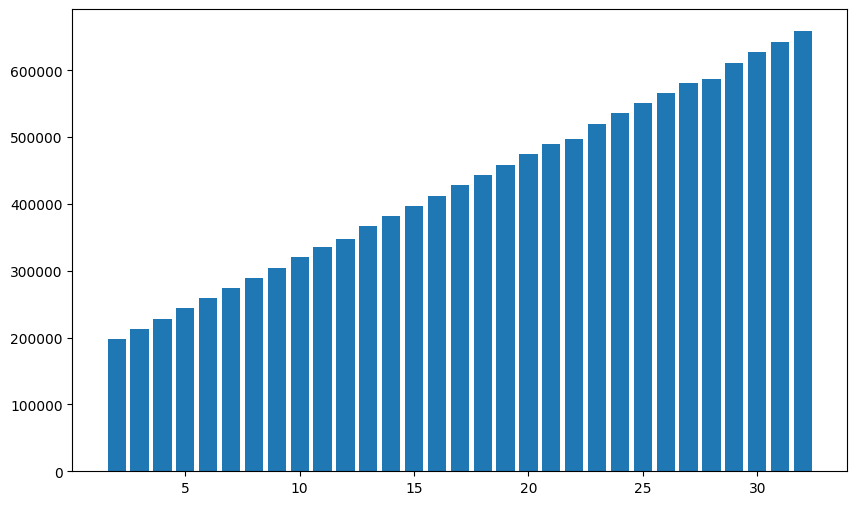

In [118]:
f = open('results/opt-cr-with-merkle/merkle_height_nft_claiming', 'r')
lines = f.readlines()

heights = []
consumed_fee_l1 = []
consumed_gas_l2 = []

for line in lines:  
    height, l2_gas, l1_fee = line.split()
    heights.append(int(height))
    consumed_gas_l2.append(int(l2_gas))
    consumed_fee_l1.append(int(l1_fee))


plt.figure(figsize=(10,6))
plt.bar(heights, consumed_gas_l2)
plt.show()
plt.figure(figsize=(10,6))
plt.bar(heights, consumed_fee_l1)
plt.show()

# L2 gas cost

In [37]:
def get_l2_gas(file_path):
    f = open(file_path, "r")
    data = json.load(f)
    labels = []
    l2_gas = []

    for row in data:
        labels.append(row['name'])
        cost = 0
        for i in row['costs']:
            cost += int(i)
        l2_gas.append(cost)
    return labels, l2_gas

# User costs

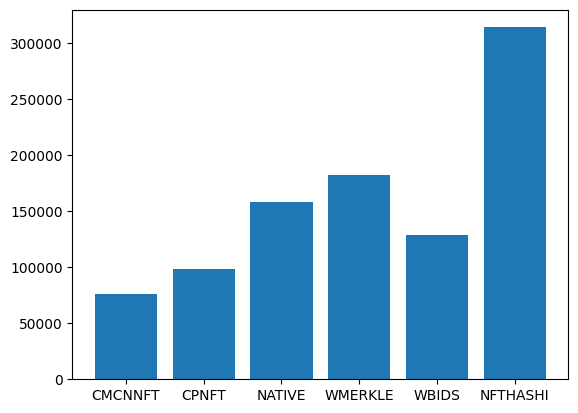

In [38]:
labels, only_user_l2_gas_lock = get_l2_gas("results/summaries/only_user_l2_gas_lock.json")
plt.bar(labels, only_user_l2_gas_lock)
plt.show()

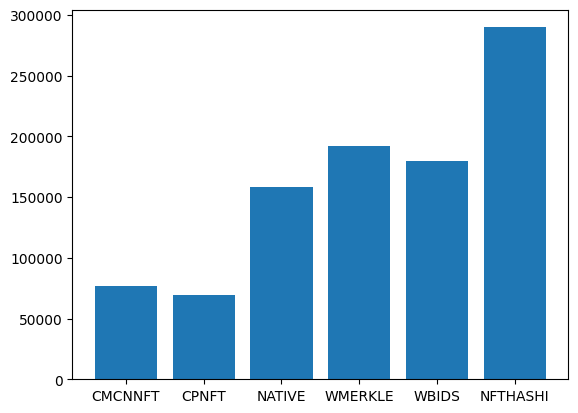

In [39]:
labels, only_user_l2_gas_unlock = get_l2_gas("results/summaries/only_user_l2_gas_unlock.json")
plt.bar(labels, only_user_l2_gas_unlock)
plt.show()

# Relayer costs

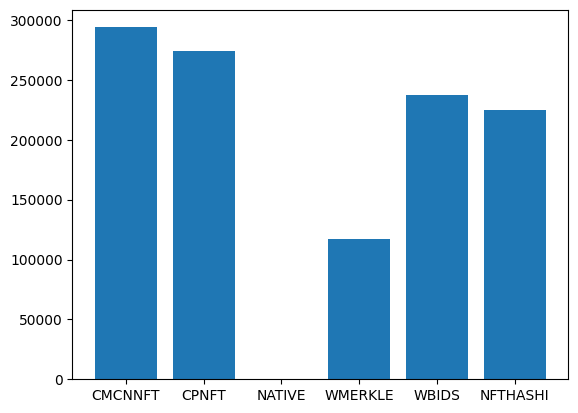

In [49]:
labels, only_relayer_l2_gas_lock = get_l2_gas("results/summaries/only_relayer_l2_gas_lock.json")
plt.bar(labels, only_relayer_l2_gas_lock)
plt.show()

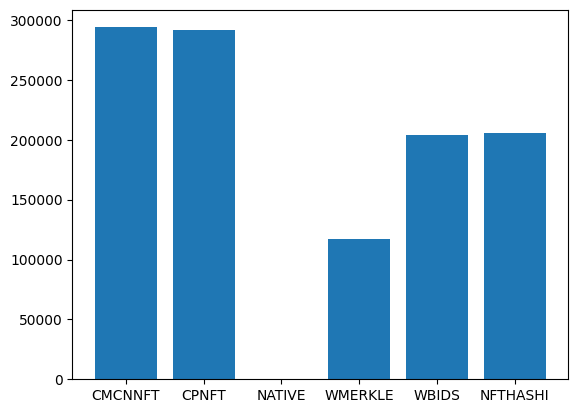

In [50]:
labels, only_relayer_l2_gas_unlock = get_l2_gas("results/summaries/only_relayer_l2_gas_unlock.json")
plt.bar(labels, only_relayer_l2_gas_unlock)
plt.show()

# L1 fee cost

In [42]:
# in GWei
CURRENT_GAS_PRICE = 30

def get_l1_fee(file_path):
    f = open(file_path, "r")
    data = json.load(f)
    labels = []
    gas_fees = []

    for row in data:
        labels.append(row['name'])
        cost = 0
        # already calculated with 30 GWei
        if 'l2_fee_costs' in row:
            for i in row['l2_fee_costs']:
                cost += int(i)
        if 'gas_costs' in row:
            for i in row['gas_costs']:
                cost += int(i) * CURRENT_GAS_PRICE
        gas_fees.append(cost)
    return labels, gas_fees

In [43]:
def remove(label, labels, inputs):
    ret_labels = []
    ret_inputs = []
    for i in range(0, len(labels)):
        if label == labels[i]:
            continue
        ret_labels.append(labels[i])
        ret_inputs.append(inputs[i])
    return ret_labels, ret_inputs

# User L1 fee cost

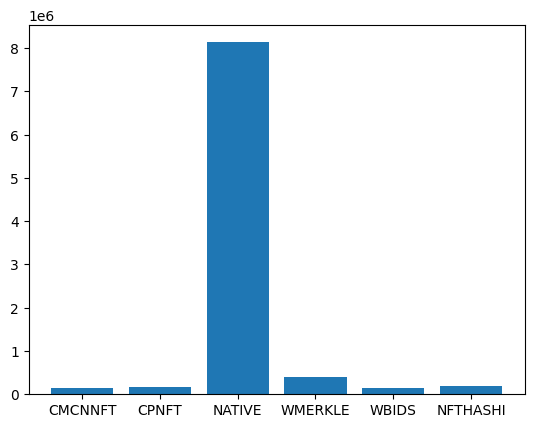

In [44]:
labels, only_user_l1_fee_lock = get_l1_fee("results/summaries/only_user_l1_fee_lock.json")
plt.bar(labels, only_user_l1_fee_lock)
plt.show()

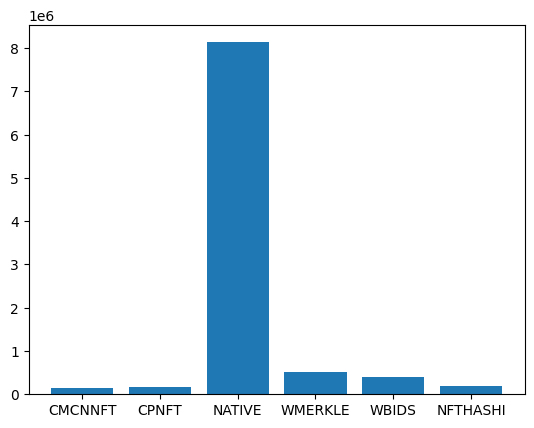

In [45]:
labels, only_user_l1_fee_unlock = get_l1_fee("results/summaries/only_user_l1_fee_unlock.json")
plt.bar(labels, only_user_l1_fee_unlock)
plt.show()

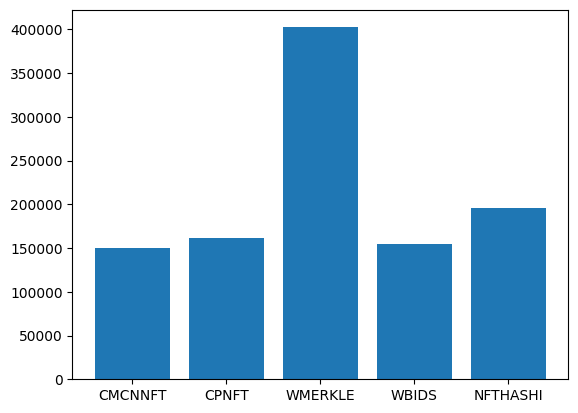

In [46]:
plt.bar(*remove("NATIVE", labels, only_user_l1_fee_lock))
plt.show()

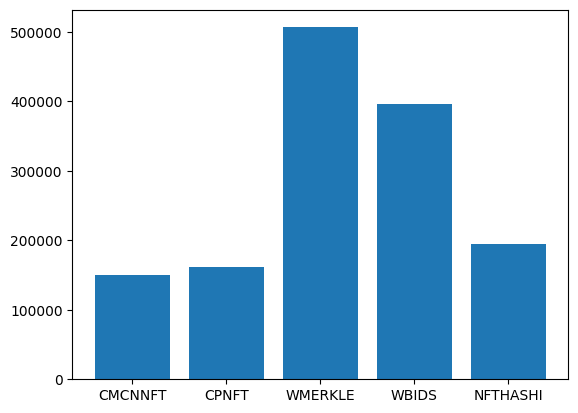

In [47]:
plt.bar(*remove("NATIVE", labels, only_user_l1_fee_unlock))
plt.show()

# Relayer L1 fee cost

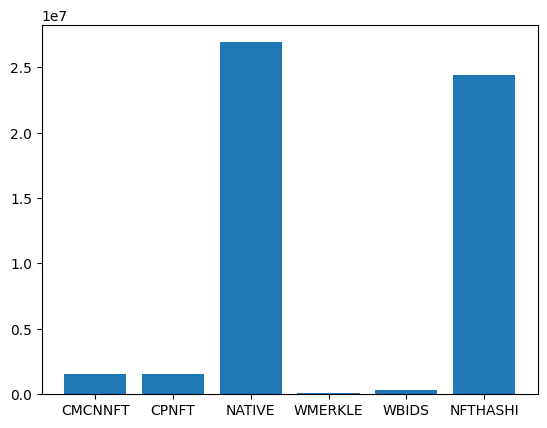

In [48]:
labels, only_relayer_l1_fee_lock = get_l1_fee("results/summaries/only_relayer_l1_fee_lock.json")
plt.bar(labels, only_relayer_l1_fee_lock)
plt.show()

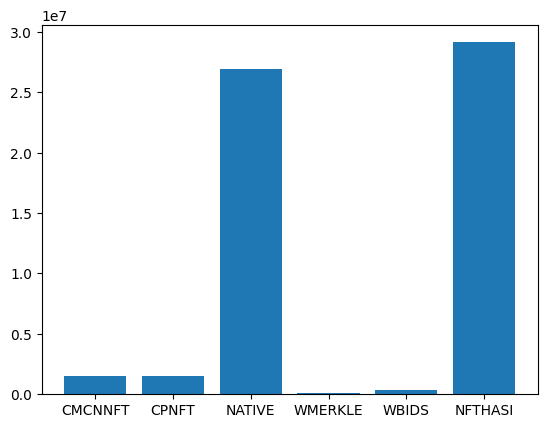

In [18]:
labels, only_relayer_l1_fee_unlock = get_l1_fee("results/summaries/only_relayer_l1_fee_unlock.json")
plt.bar(labels, only_relayer_l1_fee_unlock)
plt.show()

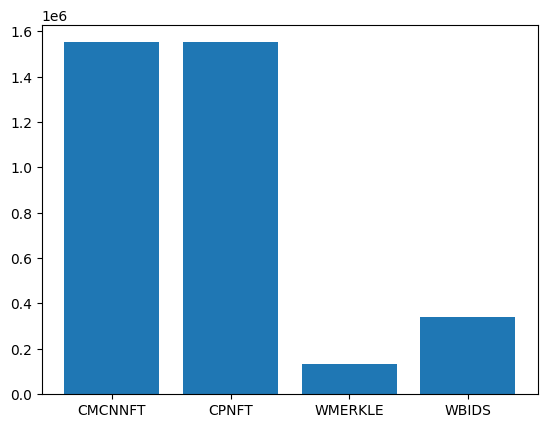

In [19]:
plt.bar(*remove("NFTHASHI", *remove("NATIVE", labels, only_relayer_l1_fee_lock)))
plt.show()

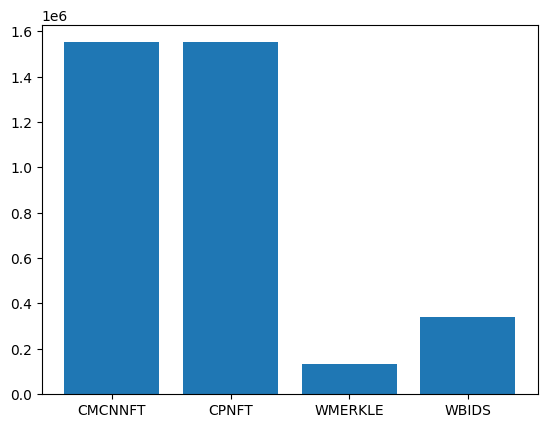

In [52]:
plt.bar(*remove("NFTHASHI", *remove("NATIVE", labels, only_relayer_l1_fee_unlock)))
plt.show()

# Summary of lock, unlock, cycle

In [94]:
# Gas prices on L2 default to 0.001 Gwei
CURRENT_OPT_GAS_COST = 0.001
def transform_l2_cost(input):
    return [cost * CURRENT_OPT_GAS_COST for cost in input]

def sum_two_list(input_1, input_2):
    ret = []
    for i in range(0, len(input_1)):
        ret.append(int(input_1[i] + input_2[i]))
    return ret

In [98]:
def predictedUserL2Cost(labels, only_user_l2_gas, only_relayer_l2_gas):
    ret = []
    for i in range(0, len(labels)):
        if labels[i] == 'WMERKLE':
            ret.append(only_user_l2_gas[i] + only_relayer_l2_gas[i]/4)
        else:
            ret.append(only_user_l2_gas[i] + only_relayer_l2_gas[i])
    return ret

def predictedRelayerPerUserL2Cost(labels, only_relayer_l2_gas):
    ret = []
    for i in range(0, len(labels)):
        if labels[i] == 'WMERKLE':
            ret.append(only_relayer_l2_gas[i]/4)
        else:
            ret.append(only_relayer_l2_gas[i])
    return ret

# l1 gas costs and l2 fee costs in GWei
def predictedUserL1Cost(labels, only_user_l2_fee_costs, only_user_l1_gas_costs, only_relayer_l2_fee_costs, only_relayer_l1_gas_costs):
    ret = []
    for i in range(0, len(labels)):
        if labels[i] == 'WMERKLE':
            ret.append(only_user_l2_fee_costs[i] + only_user_l1_gas_costs[i] + only_relayer_l2_fee_costs[i]/4 + only_relayer_l1_gas_costs[i]/4)
        elif labels[i] == 'NFTHASHI':
            ret.append(only_user_l2_fee_costs[i] + only_user_l1_gas_costs[i] + only_relayer_l2_fee_costs[i] + only_relayer_l1_gas_costs[i]/128)
        else:
            ret.append(only_user_l2_fee_costs[i] + only_user_l1_gas_costs[i] + only_relayer_l2_fee_costs[i] + only_relayer_l1_gas_costs[i])
    return ret

def predictedRelayerPerUserL1Cost(labels, only_relayer_l2_fee_costs, only_relayer_l1_gas_costs):
    ret = []
    for i in range(0, len(labels)):
        if labels[i] == 'WMERKLE':
            ret.append(only_relayer_l2_fee_costs[i]/4 + only_relayer_l1_gas_costs[i]/4)
        elif labels[i] == 'NFTHASHI':
            ret.append(only_relayer_l2_fee_costs[i] + only_relayer_l1_gas_costs[i]/128)
        else:
            ret.append(only_relayer_l2_fee_costs[i] + only_relayer_l1_gas_costs[i])
    return ret

def get_l1_data(file_path):
    f = open(file_path, "r")
    data = json.load(f)
    labels = []
    fee_costs = []
    gas_costs = []
    
    for row in data:
        labels.append(row['name'])
        # already calculated with 30 GWei
        if 'l2_fee_costs' in row:
            cost = 0
            for i in row['l2_fee_costs']:
                cost += int(i)
            fee_costs.append(cost)
        else:
            fee_costs.append(0)
        if 'gas_costs' in row:
            cost = 0
            for i in row['gas_costs']:
                cost += int(i) * CURRENT_GAS_PRICE
            gas_costs.append(cost)
        else:
            gas_costs.append(0)
    return labels, fee_costs, gas_costs

labels, only_user_l2_fee_costs_lock, only_user_l1_gas_costs_lock = get_l1_data("results/summaries/only_user_l1_fee_lock.json")
labels, only_relayer_l2_fee_costs_lock, only_relayer_l1_gas_costs_lock = get_l1_data("results/summaries/only_relayer_l1_fee_lock.json")

labels, only_user_l2_fee_costs_unlock, only_user_l1_gas_costs_unlock = get_l1_data("results/summaries/only_user_l1_fee_unlock.json")
labels, only_relayer_l2_fee_costs_unlock, only_relayer_l1_gas_costs_unlock = get_l1_data("results/summaries/only_relayer_l1_fee_unlock.json")

predicted_relayer_per_user_l1_cost_lock = predictedRelayerPerUserL1Cost(labels, only_relayer_l2_fee_costs_lock, only_relayer_l1_gas_costs_lock)
predicted_relayer_per_user_l2_cost_lock = predictedRelayerPerUserL2Cost(labels, only_relayer_l2_gas_lock)

predicted_user_l1_cost_lock = predictedUserL1Cost(labels, only_user_l2_fee_costs_lock, only_user_l1_gas_costs_lock, only_relayer_l2_fee_costs_lock, only_relayer_l1_gas_costs_lock)
predicted_user_l1_cost_unlock = predictedUserL1Cost(labels, only_user_l2_fee_costs_unlock, only_user_l1_gas_costs_unlock, only_relayer_l2_fee_costs_unlock, only_relayer_l1_gas_costs_unlock)

predicted_user_l2_cost_lock = predictedUserL2Cost(labels, only_user_l2_gas_lock, only_relayer_l2_gas_lock)
predicted_user_l2_cost_unlock = predictedUserL2Cost(labels, only_user_l2_gas_unlock, only_relayer_l2_gas_unlock)

predicted_user_full_cost_lock = sum_two_list(predicted_user_l1_cost_lock, transform_l2_cost(predicted_user_l2_cost_lock))
predicted_user_full_cost_unlock = sum_two_list(predicted_user_l1_cost_unlock, transform_l2_cost(predicted_user_l2_cost_unlock))


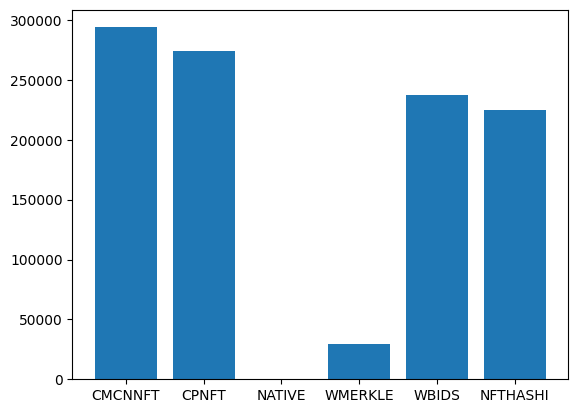

In [99]:
# prediction of relayer cost per user l2 wrapping
plt.bar(labels, predicted_relayer_per_user_l2_cost_lock)
plt.show()

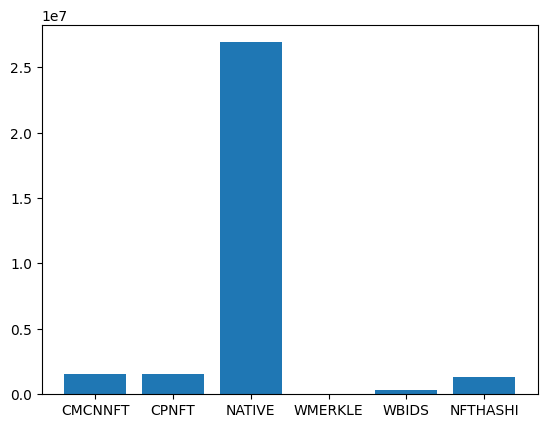

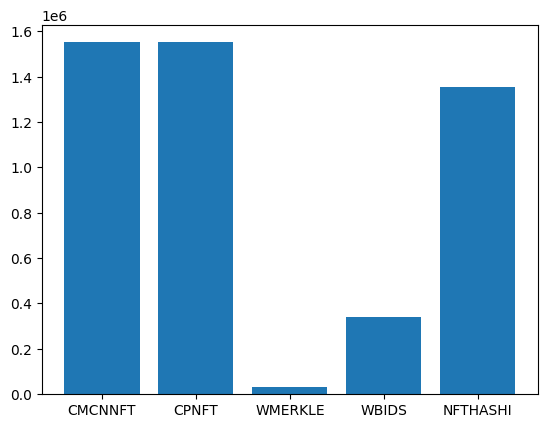

In [104]:
# prediction of relayer cost per user l1 wrapping
plt.bar(labels, predicted_relayer_per_user_l1_cost_lock)
plt.show()
plt.bar(*remove("NATIVE", labels, predicted_relayer_per_user_l1_cost_lock))
plt.show()

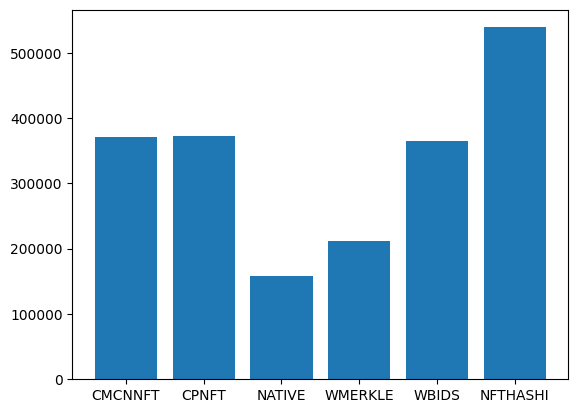

In [101]:
# predicted user cost on L2 wrapping
plt.bar(labels, predicted_user_l2_cost_lock)
plt.show()

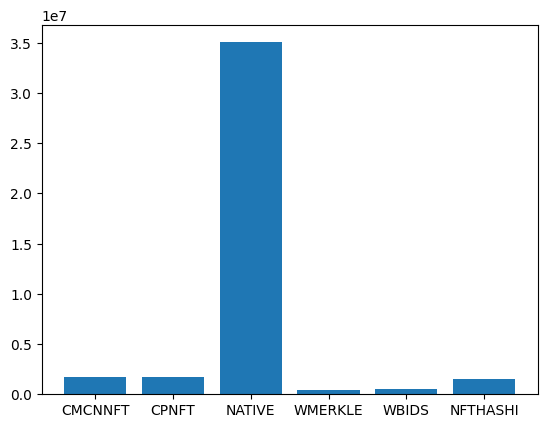

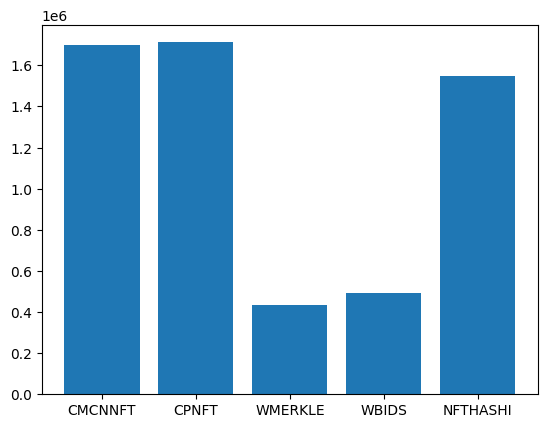

In [102]:
# predicted user cost on L1 wrapping
plt.bar(labels, predicted_user_l1_cost_lock)
plt.show()
plt.bar(*remove("NATIVE", labels, predicted_user_l1_cost_lock))
plt.show()

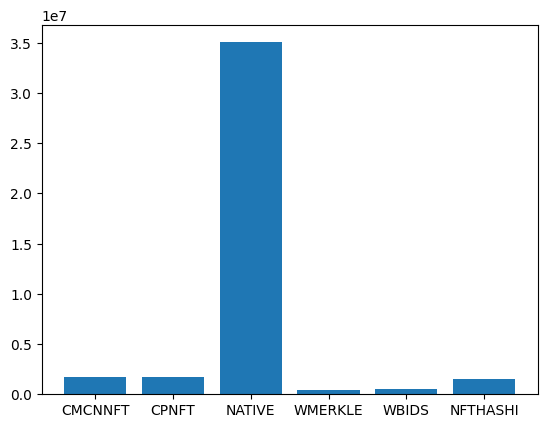

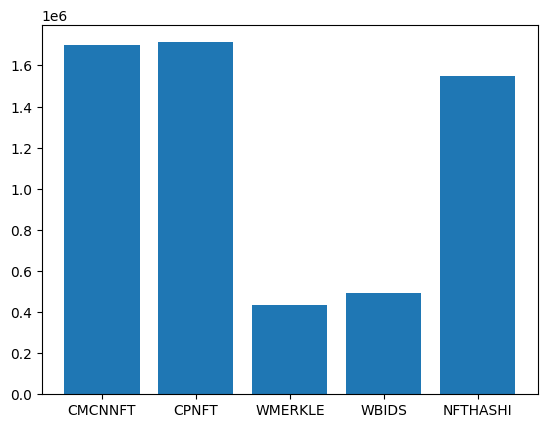

In [105]:
# full cost of wrapping
plt.bar(labels, predicted_user_full_cost_lock)
plt.show()
plt.bar(*remove("NATIVE", labels, predicted_user_full_cost_lock))
plt.show()

# Prediction of execution time

In [106]:
def getTimes(file_path):
    f = open(file_path, "r")
    data = json.load(f)
    labels = []
    times_in_second = []
    for row in data:
        labels.append(row['name'])
        times_in_second.append(int(row['time_in_second']))
    return labels, times_in_second

labels, best_case_lock_times = getTimes("results/time-complexities/best_case_lock.json")
labels, best_case_unlock_times = getTimes("results/time-complexities/best_case_unlock.json")
labels, worse_case_time = getTimes("results/time-complexities/worse_case.json")

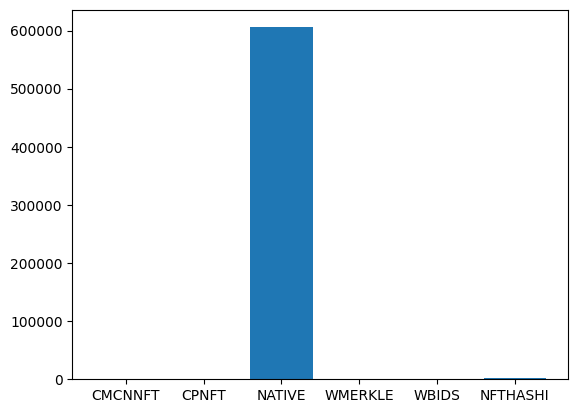

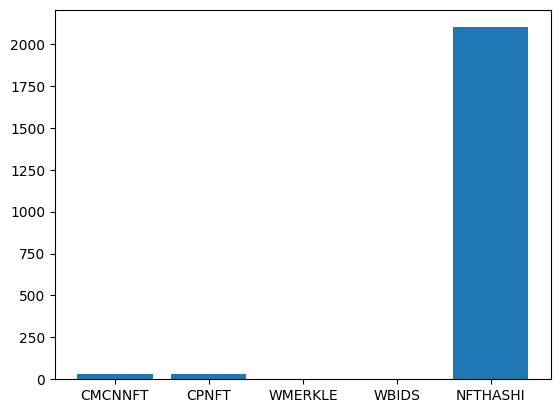

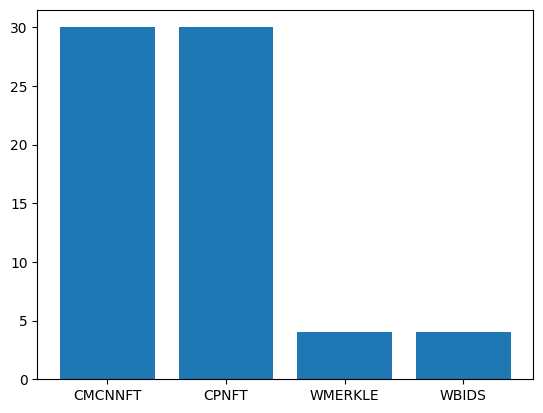

In [107]:
plt.bar(labels, best_case_lock_times)
plt.show()
plt.bar(*remove("NATIVE", labels, best_case_lock_times))
plt.show()
plt.bar(*remove("NFTHASHI", *remove("NATIVE", labels, best_case_lock_times)))
plt.show()

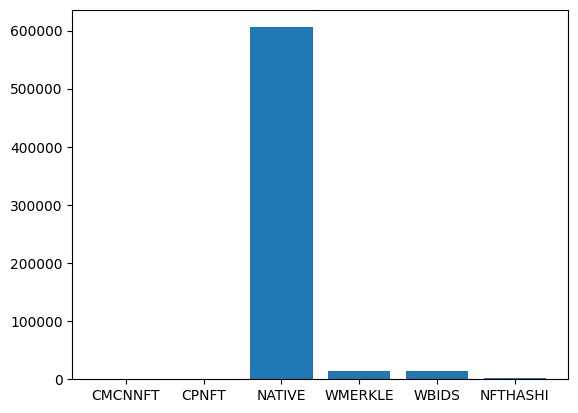

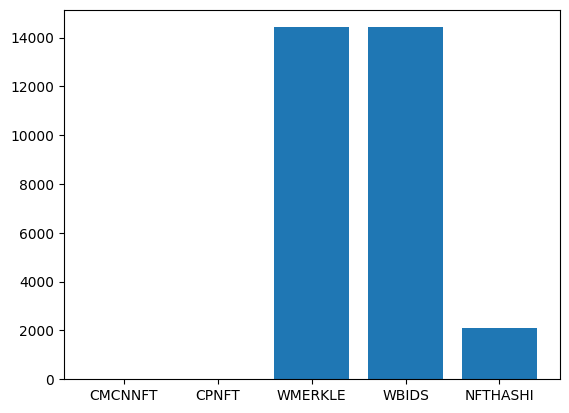

In [108]:
plt.bar(labels, best_case_unlock_times)
plt.show()
plt.bar(*remove("NATIVE", labels, best_case_unlock_times))
plt.show()

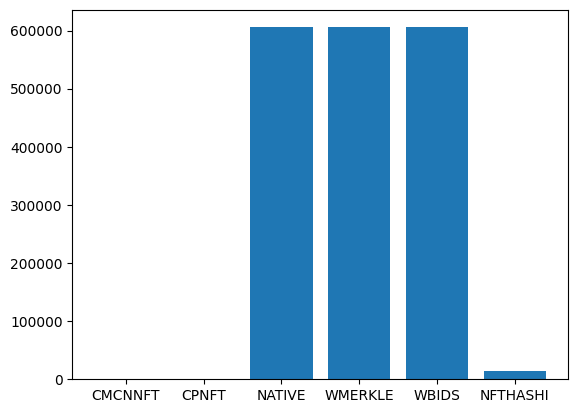

In [109]:
plt.bar(labels, worse_case_time)
plt.show()

# Trust assumptions for liveness and safety

In [81]:
def getTrusts(file_path):
    f = open(file_path, "r")
    data = json.load(f)
    labels = []
    people = []
    for row in data:
        labels.append(row['name'])
        people.append(int(row['people']))
    return labels, people

In [82]:
labels, liveness = getTrusts("results/trust-assumptions/liveness.json")
labels, safety = getTrusts("results/trust-assumptions/safety.json")

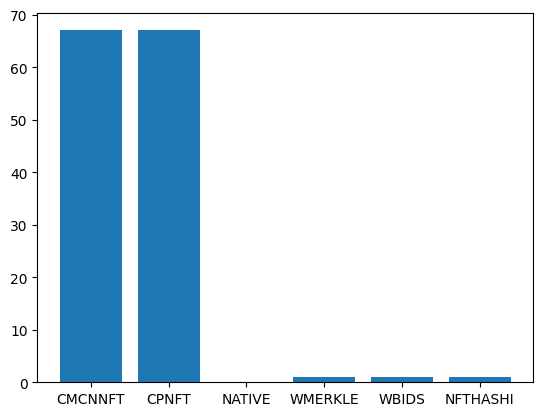

In [83]:
# plt.ylim(0, 100)
plt.bar(labels, liveness)
plt.show()

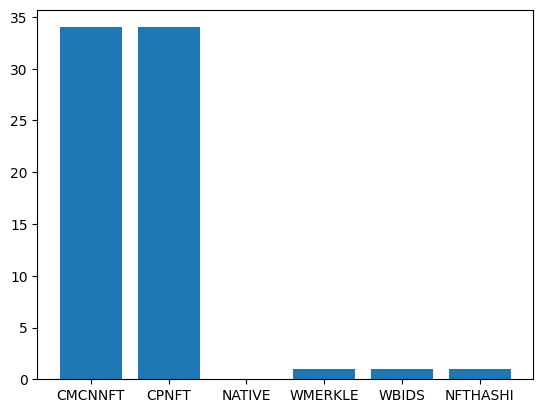

In [84]:
# plt.ylim(0, 100)
plt.bar(labels, safety)
plt.show()